In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse
import numpy as np


In [32]:
((trainX,trainY), (testX,testY)) = mnist.load_data()

In [33]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 *28* 1))

In [34]:
trainX= trainX.astype("float32") /255.0
testX= testX.astype("float32") /255.0

In [35]:
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.transform(testY)

In [36]:
model=Sequential()
model.add(Dense(256, input_shape=(784,), activation= 'sigmoid'))
model.add(Dense(128, activation= 'sigmoid'))
model.add(Dense(10, activation= 'softmax'))

In [37]:
sgd=SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2825 - accuracy: 0.1850 - val_loss: 2.2387 - val_accuracy: 0.4134
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 2.2067 - accuracy: 0.4171 - val_loss: 2.1656 - val_accuracy: 0.4314
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 2.1219 - accuracy: 0.5650 - val_loss: 2.0625 - val_accuracy: 0.5895
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 1.9978 - accuracy: 0.6270 - val_loss: 1.9088 - val_accuracy: 0.6738
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 1.8182 - accuracy: 0.6668 - val_loss: 1.6981 - val_accuracy: 0.6831
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 1.5916 - accuracy: 0.6923 - val_loss: 1.4581 - val_accuracy: 0.7144
Epoch 7/100
469/469 [==============================] - 1s 3ms/step - loss: 1.3626 - accuracy: 0.7210 - val_loss: 1.2427 - val_accuracy: 0.7460

Epoch 58/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.9088 - val_loss: 0.3054 - val_accuracy: 0.9125
Epoch 59/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3151 - accuracy: 0.9095 - val_loss: 0.3038 - val_accuracy: 0.9127
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.9097 - val_loss: 0.3023 - val_accuracy: 0.9136
Epoch 61/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3118 - accuracy: 0.9102 - val_loss: 0.3012 - val_accuracy: 0.9126
Epoch 62/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3103 - accuracy: 0.9105 - val_loss: 0.2996 - val_accuracy: 0.9125
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3088 - accuracy: 0.9109 - val_loss: 0.2984 - val_accuracy: 0.9134
Epoch 64/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3073 - accuracy: 0.9114 - val_loss: 0.2965 - val_accuracy:

In [28]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.89      0.89      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



NameError: name 'args' is not defined

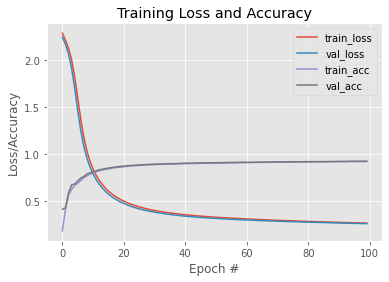

In [38]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])